In [1]:
import os
import pickle
import numpy as np
import pandas as pd
import random as r
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def breaker(num: int=50, char: str="*") -> None:
    print("\n" + num*char + "\n")

    
def get_object_columns(df) -> list:
    object_columns: list = []
    for col in df.columns:
        if df[col].dtype == "object":
            object_columns.append(col)

    return object_columns

In [3]:
class CFG(object):
    def __init__(self,
                 seed: int = 42,
                 n_splits: int = 5,
                 show_info: bool = False,
                 ):

        self.seed = seed
        self.n_splits = n_splits
        self.show_info = show_info
        self.train_data_read_path = "../input/tab-hack-20/Week8_train.csv"
        self.test_data_read_path = "../input/tab-hack-20/Week8_test.csv"
        self.model_save_path = "models"
        if not os.path.exists(self.model_save_path): os.makedirs(self.model_save_path)

cfg = CFG(seed=42, show_info=True)

In [4]:
tr_data = pd.read_csv(cfg.train_data_read_path)
tr_data.drop(columns=["id", "PARTY_ID"], inplace=True)
tr_data.head(5)

,V_1,V_2,V_3,V_4,V_5,V_6,V_7,V_8,V_9,V_10,...,V_474,V_475,V_476,V_477,V_478,V_479,V_480,V_481,V_482,TARGET
0,0,0,0,0,0,0,0,0,0,0.000000,...,0,0,0,0,1,0,0.000000,0.0,0.0,0
1,0,0,0,0,0,0,0,0,0,110.038907,...,0,0,0,0,0,2,26.010373,0.0,0.0,0
2,0,0,0,0,0,0,0,0,0,0.000000,...,0,0,0,0,1,0,2248.357090,0.0,0.0,1
3,0,0,0,0,2,0,0,0,0,103.288586,...,0,0,0,0,0,0,2285.146561,0.0,0.0,0
4,0,0,0,0,0,0,0,0,0,0.000000,...,0,0,0,0,0,0,98.395599,0.0,0.0,0


In [5]:
object_columns = get_object_columns(tr_data)
breaker()
print(object_columns)
breaker()
print("No.of Unique Values\n")
for object_column in object_columns:
    print(f"{object_column} : {tr_data[object_column].nunique()}")
breaker()


**************************************************

['V_245', 'V_271', 'V_301', 'V_304', 'V_316', 'V_400', 'V_410', 'V_434']

**************************************************

No.of Unique Values

V_245 : 2
V_271 : 7
V_301 : 15
V_304 : 2
V_316 : 3
V_400 : 3
V_410 : 2
V_434 : 85

**************************************************



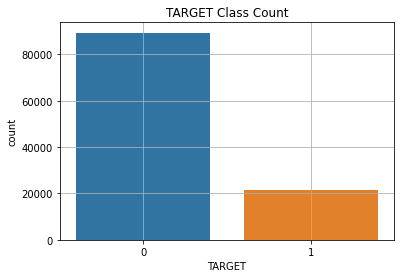

In [6]:
sns.countplot(data=tr_data, x="TARGET")
plt.grid()
plt.title("TARGET Class Count")
plt.show()

In [7]:
tr_data.drop(columns=object_columns, inplace=True)
features = tr_data.iloc[:, :-1]

breaker()
print(f"Dataset Mean : {features.mean().mean():.2f}")
print(f"Dataset Std  : {features.std().std():.2f}")
breaker()


**************************************************

Dataset Mean : 1975.16
Dataset Std  : 32099.38

**************************************************

